C:\Users\20161016\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


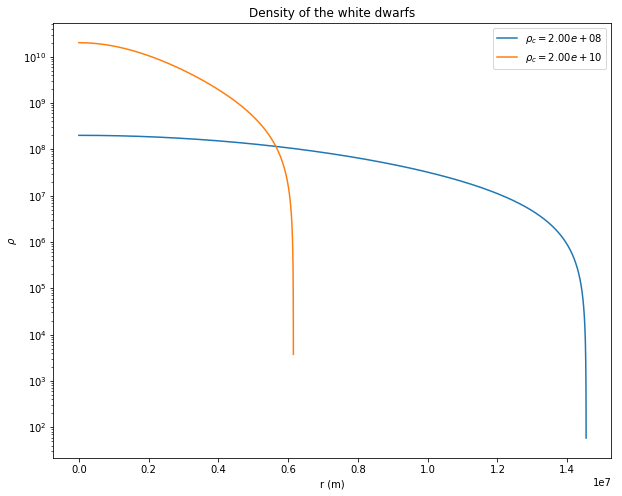

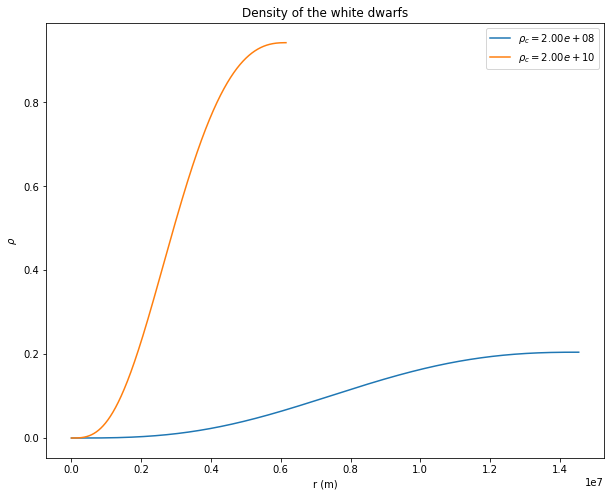

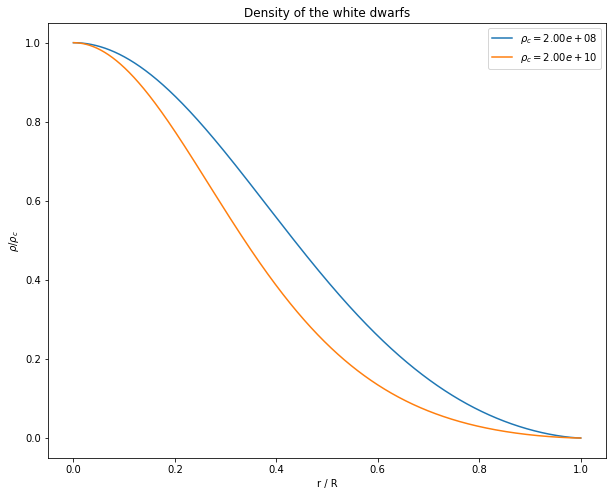

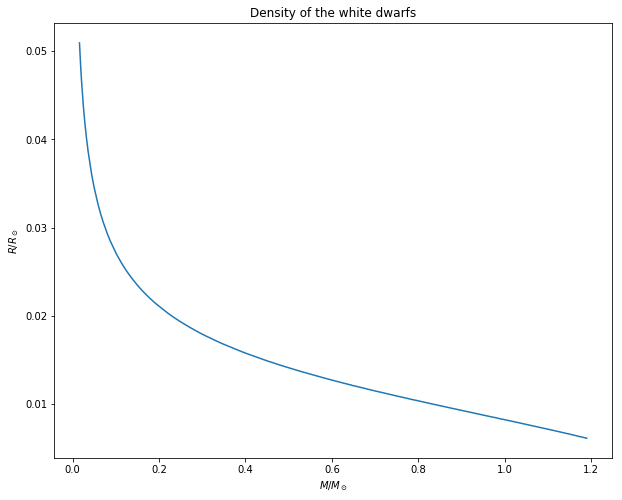

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

SolarMass = 1.988e30
SolarRadius = 6.96e8
ElectronMass = 9.109e-31
m_mu = 1.66e-27
mu_e = 2.00
G = 6.674e-11
c = 2.998e8
h = 6.626e-34
k1 = 4 * math.pi / SolarMass
k2 = 3 * m_mu * mu_e * G * SolarMass / (ElectronMass * c ** 2)
k3 = (3 / (8 * math.pi * m_mu * mu_e)) ** (2 / 3) * (h / (ElectronMass * c)) ** 2


# solve the system dy/dr = f(y, r)
# With variables x1 = m / SolarMass, x2 = rho / Rhoc
def f(y, r, rhoc):
    x1i = y[0]
    x2i = y[1]
    # equations 4 and 5
    dx1dr = k1 * x2i * r ** (2) * rhoc
    dx2dr = -k2 * x2i * x1i / (r ** 2) * (1 + k3 * (x2i * rhoc) ** (2 / 3)) ** (1 / 2) / (k3 * (x2i * rhoc) ** (2 / 3))
    return [dx1dr, dx2dr]


# initial conditions
x10 = 0  # initial mass
x20 = 1  # initial density
y0 = [x10, x20]  # initial condition vector
r_max = 1e8

#Setup figure
fig1, ax1 = plt.subplots()
ax1.set_yscale('log')
ax1.set_xlabel('r (m)')
ax1.set_ylabel(r'$ \rho $')
ax1.set_title('Density of the white dwarfs')

fig2, ax2 = plt.subplots()
ax2.set_xlabel('r (m)')
ax2.set_ylabel(r'$ \rho $')
ax2.set_title('Density of the white dwarfs')


fig3, ax3 = plt.subplots()
ax3.set_xlabel('r / R')
ax3.set_ylabel(r'$ \rho / \rho_c $')
ax3.set_title('Density of the white dwarfs')


fig4, ax4 = plt.subplots()
ax4.set_xlabel(r'$ M / M_\odot $')
ax4.set_ylabel(r'$R / R_\odot $')
ax4.set_title('Density of the white dwarfs')

def solve(rhoc):
    r = np.linspace(0.0000001, r_max, 100000)  # radius grid
    soln = odeint(f, y0, r, args=(rhoc,))
    m = soln[:, 0]
    rho = soln[:, 1]
    r = r[m != 0]
    rho = rho[m != 0]
    m = m[m != 0]
    r = r[np.invert(np.isnan(m))]
    rho = rho[np.invert(np.isnan(m))]
    m = m[np.invert(np.isnan(m))]
    return r, m, rho


# Parameter central density 1
Rhoc = [2e8, 2e10]
for i in Rhoc:
    radius, mass, density = solve(i)
    ax1.plot(radius, density*i, label=r'$ \rho_c={:.2e} $'.format(i))
    ax2.plot(radius, mass, label=r'$ \rho_c={:.2e} $'.format(i))
    ax3.plot(radius/radius[-1], density, label=r'$ \rho_c={:.2e} $'.format(i))

# Total mass
Rhoc_array = np.logspace(6, 11.031, 1000)
total_radius = []
total_mass = []
for i in Rhoc_array:
    radius, mass, _ = solve(i)
    total_radius.append(radius[-1]/SolarRadius)
    total_mass.append(mass[-1])

ax4.plot(total_mass, total_radius)

ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)

#saving figures
fig4.savefig('totalRadiusMass.png')
fig3.savefig('densityrelativeradius.png')

plt.show()